<a href="https://colab.research.google.com/github/SunnyChoudhary850/Titanic-Survival-Prediction-using-XGBoost-/blob/main/titanic_dataset_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/train.csv")

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.set_index("PassengerId", inplace=True)

In [ ]:
#data

In [ ]:
#import seaborn as sns
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix of All Features')
#plt.show()

In [ ]:
data.drop("Name", axis=1, inplace=True)
data.drop('Embarked', axis=1, inplace=True)
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
#data

In [ ]:
def get_ticket_prefix(Ticket	):
    parts =Ticket.split()
    if len(parts) > 1:
        return parts[0].replace('.', '')
    elif parts[0].isalpha():
        return parts[0]
    else:
        return 0

data['TicketPrefix'] = data['Ticket'].apply(get_ticket_prefix)

data.drop('Ticket', axis=1, inplace=True)

In [ ]:
#data

In [ ]:
cols = list(data.columns)
cols.remove('Survived')
cols.append('Survived')
data = data[cols]

In [ ]:
#data

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [ ]:
#data["Sex"]

In [ ]:
data['TicketPrefix'].nunique()

35

In [ ]:
data['TicketPrefix'].unique()

array(['A/5', 'PC', 'STON/O2', 0, 'PP', 'CA', 'SC/Paris', 'SC/A4', 'A/4',
       'SP', 'SOC', 'SO/C', 'W/C', 'SOTON/OQ', 'WEP', 'STON/O', 'A4', 'C',
       'SC/PARIS', 'SOP', 'A5', 'Fa', 'LINE', 'FCC', 'SW/PP', 'SCO/W',
       'P/PP', 'SC', 'SC/AH', 'A/S', 'WE/P', 'SO/PP', 'FC', 'SOTON/O2',
       'CA/SOTON'], dtype=object)

In [ ]:
data['TicketPrefix'] = data['TicketPrefix'].astype(str)
data['TicketPrefix'] = le.fit_transform(data['TicketPrefix'])

In [ ]:
data['TicketPrefix'] = le.fit_transform(data['TicketPrefix'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        891 non-null    int64  
 1   Sex           891 non-null    int64  
 2   Age           714 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   TicketPrefix  891 non-null    int64  
 7   Survived      891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler as scalar
scalar=scalar()

In [ ]:
train_x=scalar.fit_transform(train_x)
test_x=scalar.transform(test_x)

In [ ]:
#scalar_y=scalar()

In [ ]:
train_y=train_y

In [ ]:
#data

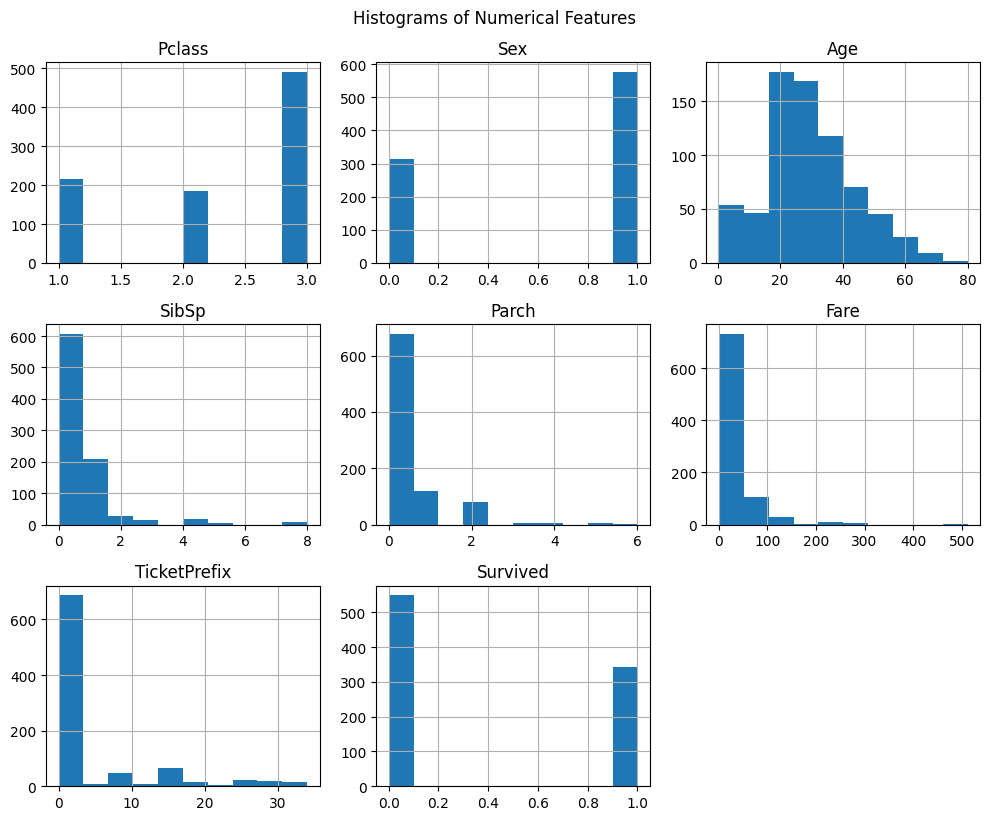

In [ ]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

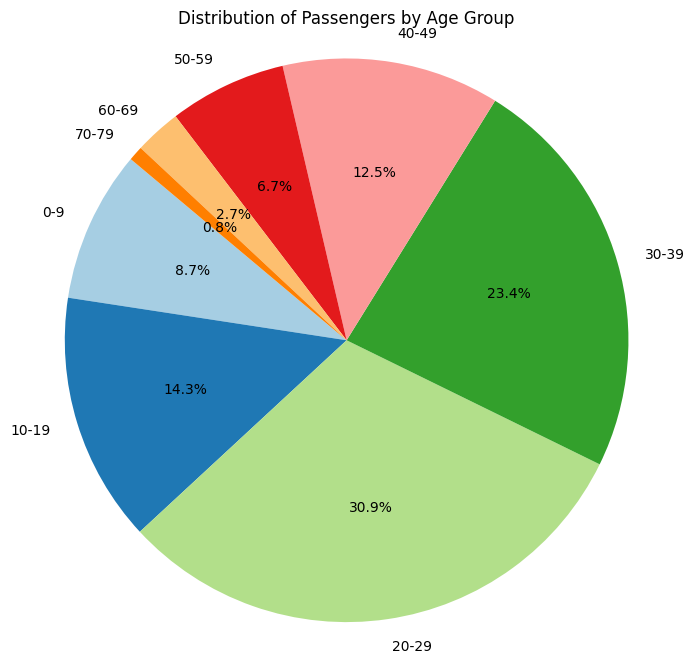

In [ ]:
# Count the occurrences of each age group
age_group_counts = data['AgeGroup'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Passengers by Age Group")
plt.axis('equal')
plt.show()

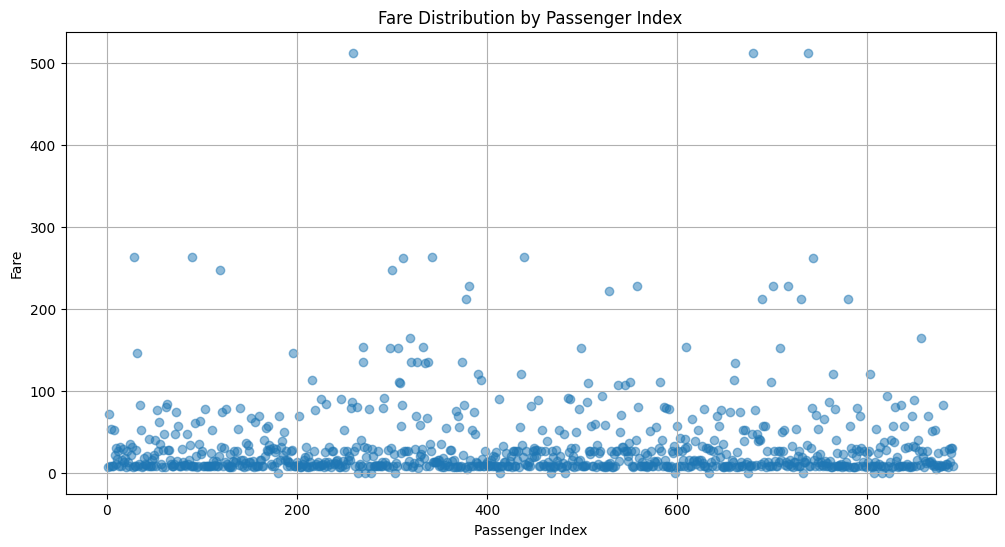

In [ ]:
# Create a scatter plot of fare vs passenger index
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['Fare'], alpha=0.5)
plt.xlabel("Passenger Index")
plt.ylabel("Fare")
plt.title("Fare Distribution by Passenger Index")
plt.grid(True)
plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
xgboos = xgb.XGBClassifier()

In [ ]:
xgboos.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
pred_y = xgboos.predict(test_x)

In [ ]:
print("Accuracy:", accuracy_score(test_y, pred_y))

Accuracy: 0.8379888268156425


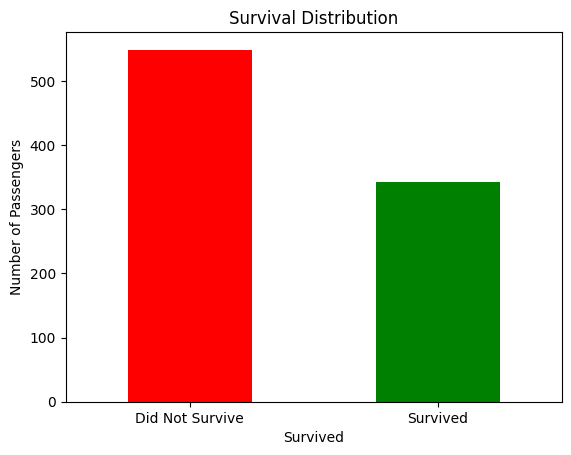

In [ ]:
import matplotlib.pyplot as plt

# Count of survivors
data['Survived'].value_counts().plot(kind='bar', color=['red','green'])
plt.xticks([0,1], ['Did Not Survive', 'Survived'], rotation=0)
plt.ylabel("Number of Passengers")
plt.title("Survival Distribution")
plt.show()

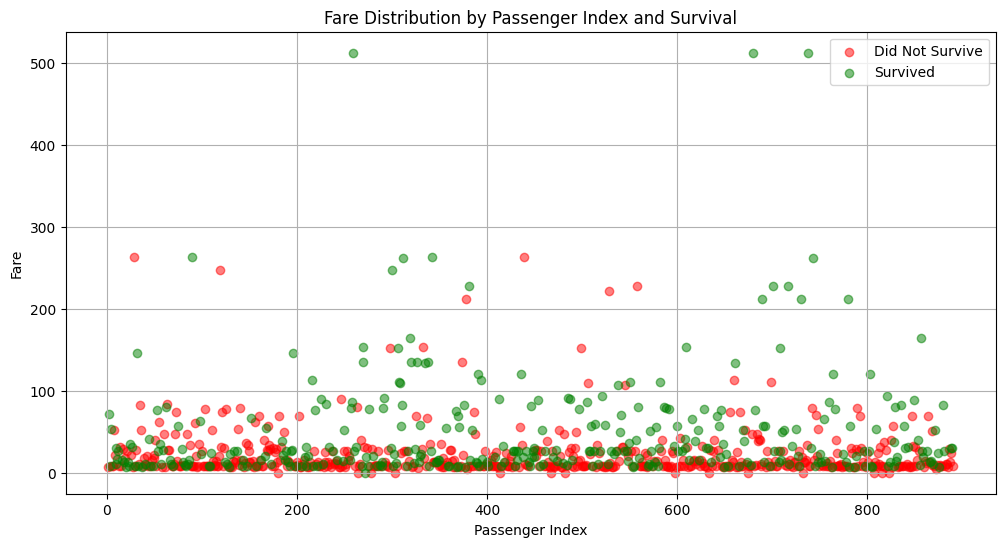

In [ ]:
# Create a scatter plot of fare vs passenger index, colored by survival
plt.figure(figsize=(12, 6))
plt.scatter(data.index[data['Survived'] == 0], data['Fare'][data['Survived'] == 0], alpha=0.5, color='red', label='Did Not Survive')
plt.scatter(data.index[data['Survived'] == 1], data['Fare'][data['Survived'] == 1], alpha=0.5, color='green', label='Survived')
plt.xlabel("Passenger Index")
plt.ylabel("Fare")
plt.title("Fare Distribution by Passenger Index and Survival")
plt.grid(True)
plt.legend()
plt.show()

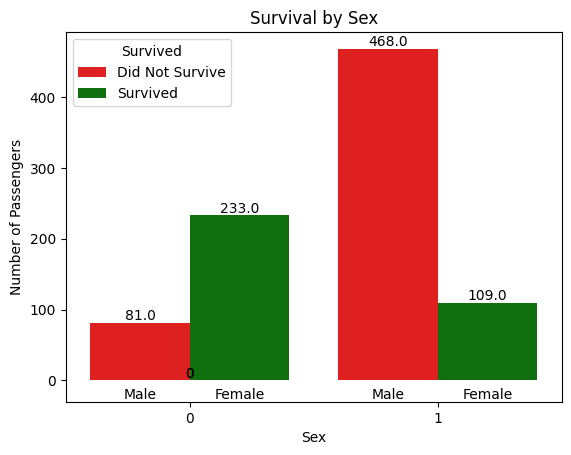

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot
ax = sns.countplot(x='Sex', hue='Survived', data=data, palette=['red','green'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

bar_positions = [p.get_x() + p.get_width()/2 for p in ax.patches]
bar_labels = ['Male', 'Male', 'Female', 'Female']
for pos, label in zip(bar_positions, bar_labels):
    ax.text(pos, -10, label, ha='center', va='top', fontsize=10)
plt.ylabel("Number of Passengers")
plt.title("Survival by Sex")
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.ylim(bottom=-30)
plt.show()


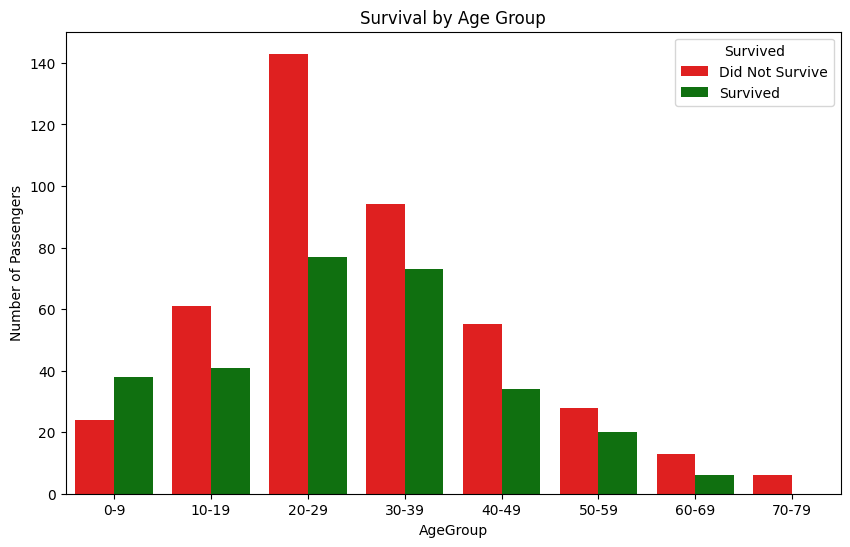

In [ ]:
# Create age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Plot survival by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=data, palette=['red','green'])
plt.ylabel("Number of Passengers")
plt.title("Survival by Age Group")
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()